In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (12, 8)


import scipy.ndimage as ndimage

In [3]:
cd ../..

C:\Users\Benjamin\PycharmProjects\Mastercode


In [4]:
from Ising.Data import IsingData
data = []
data.append(IsingData("Ising/8x8_120temp_1000each/"))
data.append(IsingData("Ising/16x16_240temp_1000each/"))
data.append(IsingData("Ising/24x24_120temp_1000each/"))
data.append(IsingData("Ising/32x32_120temp_1000each/"))

Loading data from precreated .npz
Loading data from precreated .npz
Loading data from precreated .npz
Loading data from precreated .npz


## Magnetization

In [5]:
Ls = [8, 16, 24, 32]

In [6]:
from helper.helper import calc_magnetization

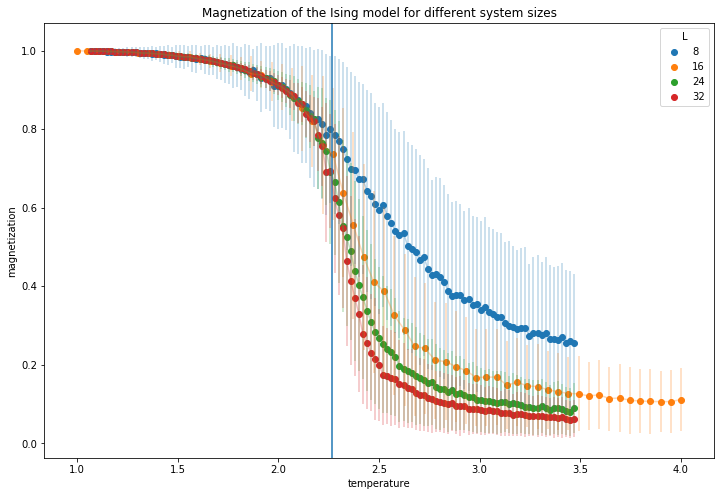

In [7]:
for d, l in zip(data, Ls):
    t, m, me = calc_magnetization(d.train_data)
    plt.scatter(t, m, label="{}".format(l))
    plt.errorbar(t, m, yerr=me, alpha=0.3)

plt.axvline(2.269)
plt.title("Magnetization of the Ising model for different system sizes")
plt.legend(title="L")
plt.xlabel("temperature")
plt.ylabel("magnetization")

In [14]:
res = []
for d, l in zip(data, Ls):
    res.append(calc_magnetization(d))

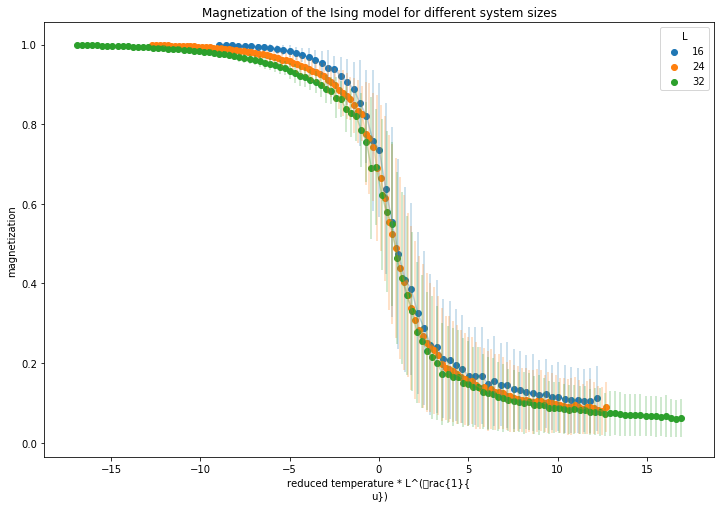

In [45]:
for d, l, r in zip(data, Ls, res):
    if l==8:
        continue
    t, m, me = r
    t = (t-2.269)/2.269
    s = l**1
    plt.scatter(t*s, m, label="{}".format(l))
    plt.errorbar(t*s, m, yerr=me, alpha=0.3)

plt.title("Magnetization of the Ising model for different system sizes")
plt.legend(title="L")
plt.xlabel("reduced temperature * L^(\frac{1}{\nu})")
plt.ylabel("magnetization")

## Mean energy

$E = -\frac{1}{L^2} \sum_{<i,j>} s_is_j$

In [46]:
def mean_energy_per_site(config):
    
    def per_site(values):
        return sum(values[[0,1]]*values[2])
    
    footprint = np.array([[0,1,0],
                          [1,1,0],
                          [0,0,0]])
    return -np.mean(ndimage.generic_filter(config, per_site, footprint=footprint, mode='wrap'))

In [51]:
e_results = []
for d, L in zip(data, Ls):
    temps = np.unique(d.train_data[2])
    E = np.zeros((len(temps)))
    Eerr = np.zeros((len(temps)))

    for t,r in zip(temps, range(len(temps))):
        print(t)
        I = np.where(d.train_data[2]==t)[0]

        energies = [mean_energy_per_site(np.reshape(d.train_data[0][i,...], (L,L))) for i in I]
        E[r] = np.mean(energies)
        Eerr[r] = np.std(energies)
    
    e_results.append((temps, E, Eerr))

1.06899965151
1.08916800634
1.10933617323
1.1295044638
1.14967240085
1.16983966178
1.19000868706
1.21017612903
1.23034523487
1.25051271021
1.27068032224
1.29084891388
1.3110163392
1.33118568709
1.3513531775
1.3715201106
1.39168966434
1.41185705794
1.43202465374
1.45219237483
1.47236156488
1.49252840282
1.51269682077
1.53286540062
1.55303377383
1.57320269458
1.59336903542
1.61353823117
1.6337066353
1.65387395165
1.67404081646
1.69420885529
1.71437780086
1.73454520225
1.75471535885
1.77488117171
1.79505176032
1.81521806215
1.83538774401
1.85555609161
1.87572215303
1.89588914357
1.91605752005
1.93622838201
1.95639584931
1.97656192865
1.99672935731
2.01689756782
2.03706646133
2.05723643201
2.07740407587
2.09757059374
2.11773774783
2.1379078861
2.15807465212
2.17824585861
2.19841098854
2.21857882278
2.23874916607
2.25891707515
2.27908280592
2.29925228316
2.31942144352
2.33958626756
2.35975392486
2.37992674585
2.40009024339
2.42025853202
2.44042912506
2.46059964813
2.48076169307
2.5009315970

In [24]:
np.save("mean_energy", e_results)

NameError: name 'e_results' is not defined

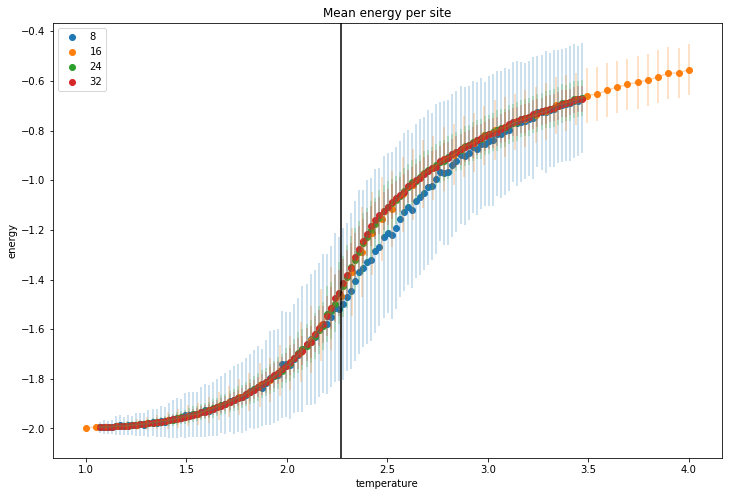

In [62]:
for r, L in zip(e_results, Ls):
    plt.errorbar(r[0], r[1], yerr=r[2], alpha=0.3)
    plt.scatter(r[0], r[1], label=L)
    
plt.axvline(2.269, c='k')
plt.legend()
plt.title("Mean energy per site")
plt.xlabel("temperature")
plt.ylabel("energy")